In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
import arabic_reshaper
from bidi.algorithm import get_display

In [58]:
df = pd.read_csv('Arabic_poetry_dataset.csv')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54944 entries, 0 to 54943
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54944 non-null  int64 
 1   category    54944 non-null  object
 2   poet_name   54944 non-null  object
 3   poem_title  54944 non-null  object
 4   poem_text   54944 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [60]:
df.head()

,id,category,poet_name,poem_title,poem_text
0,0,الإمارات,خلفان بن مصبح,بدت تختال في حُلل الجمالِ,بدت تختال في حُلل الجمالِ\nوجادت بالزيارة والو...
1,1,الإمارات,خلفان بن مصبح,يا طائر الشعر القرير,يا طائر الشعر القرير\nيا وحي إلهام الصدور\nأسع...
2,2,الإمارات,خلفان بن مصبح,بنت حجرات أرى من عجب,بنت حجرات أرى من عجب\nأن أرى فيك جمال العرب\nد...
3,3,الإمارات,خلفان بن مصبح,هذا الربيع بنور الحسن وافانا,هذا الربيع بنور الحسن وافانا\nوقد كسا الأرض با...
4,4,الإمارات,خلفان بن مصبح,روحي فداك وإن مُنحتُ صدوداً,روحي فداك وإن مُنحتُ صدوداً\nأخفاك ما بي أم أط...


In [61]:
df['category'].unique()

array(['الإمارات', 'البحرين', 'الجزائر', 'السعودية', 'السودان', 'العراق',
       'المغرب', 'اليمن', 'تونس', 'سوريا', 'عمان', 'فلسطين', 'لبنان',
       'ليبيا', 'مصر', 'الأردن', 'الكويت', 'قطر', 'موريتانيا',
       'العصر الجاهلي', 'العصر الإسلامي', 'العصر العباسي',
       'العصر الايوبي', 'العصر العثماني', 'عصر المخضرمون', 'العصر الاموي',
       'العصر الأندلسي', 'العصر المملوكي'], dtype=object)

In [62]:
df['poet_name'].unique()

array(['خلفان بن مصبح', 'سالم بن عبدالله الكراني', 'حماد بن سعيد',
       'مبارك بن حمد العقيلي', 'علي بن محمد الشحي', 'محمد بن حمود الشحي',
       'محمد بن صالح المنتفقي', 'يوسف بن رويسم', 'هدى السعدي',
       'مانع سعيد العتيبة', 'عارف الخاجة', 'حمد بن خليفة أبو شهاب',
       'كريم معتوق', 'سالم أبو جمهور القبيسي', 'قاسم حداد',
       'أحلام مستغانمي', 'سهام آل براهمي', 'جلواح', 'عبد القادر الجزائري',
       'سليمان بن سحمان', 'عبد الرحمن بن مساعد', 'أحمد اللهيب',
       'عبدالرحمن العشماوي', 'شريف بقنه', 'ابن بشير الإحسائي',
       'سامي المالكي', 'غازي القصيبي', 'محمد بن عبود العمودي',
       'مدثر بن إبراهيم بن الحجاز', 'محمد عبد الباري', 'إدريس جمّاع',
       'حمزة الملك طمبل', 'احمد مطر', 'نازك الملائكة', 'بدر شاكر السياب',
       'محمد مهدي الجواهري', 'عبد الرزاق عبد الواحد',
       'بهاء الدين الصيادي', 'معروف الرصافي', 'أبو الفيض الكتاني',
       'مَحمد اسموني', 'شاعر الحمراء', 'عبدالله البردوني',
       'عبد الولي الشميرى', 'ابن شهاب العلوي', 'محمد الشوكاني',
       'ابن طاه

In [63]:
df=df[df['category']=='السعودية']

In [64]:
df=df[df['poet_name']=='غازي القصيبي']

In [65]:
df.head()

,id,category,poet_name,poem_title,poem_text
1219,1326,السعودية,غازي القصيبي,قل لها,قل لها .. إنه تأمَّل في دنياه\nحيناً فعاد يحضن...
1220,1327,السعودية,غازي القصيبي,رسالة المتنبي الأخيرة إلى سيف الدولة,بيني وبينك ألف واش ينعب\nفعلام أسهب في الغناء ...
1221,1328,السعودية,غازي القصيبي,مرثية فارس سابق,عجباً ! كيف اتخذناكَ صديقاً ؟\nوحَسبناك أخاً ب...
1222,1329,السعودية,غازي القصيبي,الموت و جلاجل,* مات عدد من الطالبات عندما\nانهارت عليهن مدرس...
1223,1330,السعودية,غازي القصيبي,شهداء,يشهد لله أنكم شهدءُ\nيشهد لأنبيءُ ولأوليءُ\nمت...


In [66]:
import nltk
nltk.download("stopwords")
arb_stopwords = set(nltk.corpus.stopwords.words("arabic"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
df['poem_text']=df['poem_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (arb_stopwords)]))

In [68]:
text= " ".join(title for title in df.poem_text)

In [69]:
data = arabic_reshaper.reshape(text)
data = get_display(data) # add this line
wc = WordCloud(max_font_size=500, max_words=50, font_path='B Vahid Bold.ttf', background_color='white',
                  mode='RGB', width=2000, height=1000).generate(data)

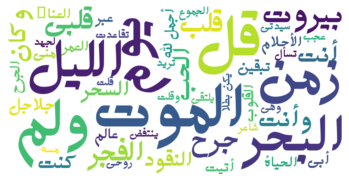

In [70]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [72]:
wc.to_file('wc.png')